In [79]:
%matplotlib inline
import pandas as pd
import numpy as np 
import re   
import seaborn as sns
import matplotlib.pyplot as plt 
import calendar 
import warnings
from IPython.display import display, HTML 
from IPython.display import Image
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

### Visualizations FROM NIESEN  REPORTS 

### Metrics 
#### 1) Age (18-34, 35-49, 50-64, 65 + )
#### 2) Watch Freqneucy (daily, weekly, 3 or fewer per month)
#### 3) Services (netflix, youtube, hulu, amazon prime)

## Streaming_Frequency (NIESEN  REPORT)

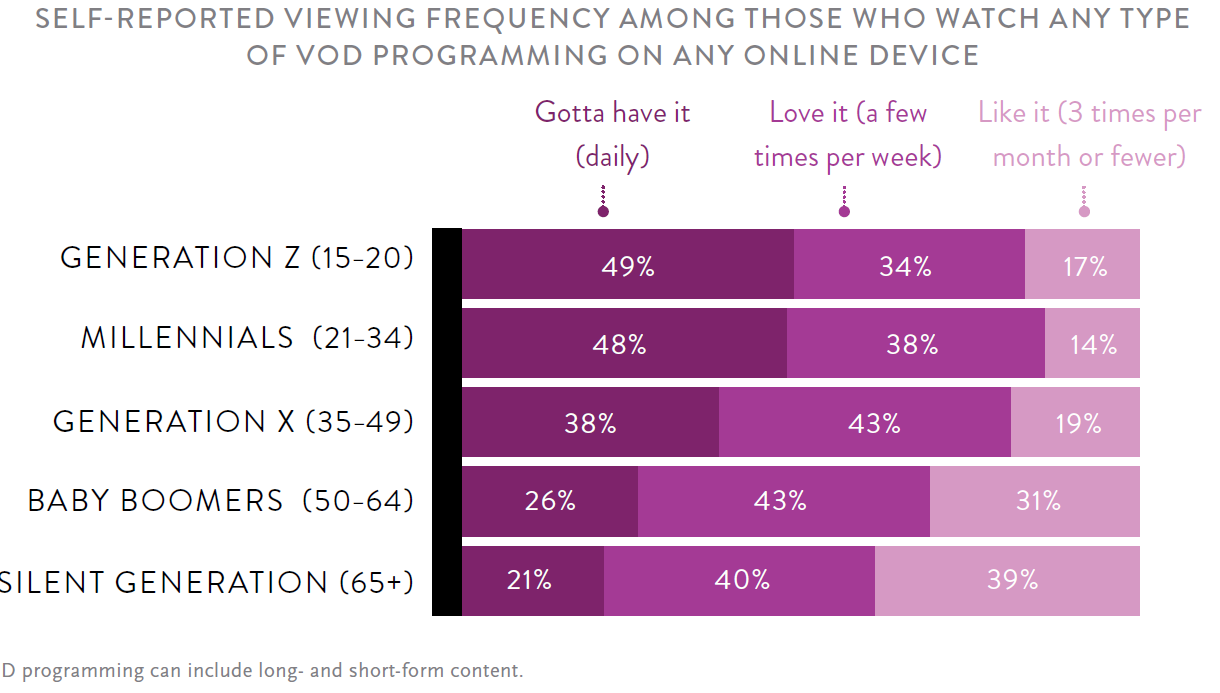

In [80]:
Image(filename='data/vis_Streaming_Frequency.PNG',width=400, height=200)

## Service Popularity (NIESEN  REPORT)

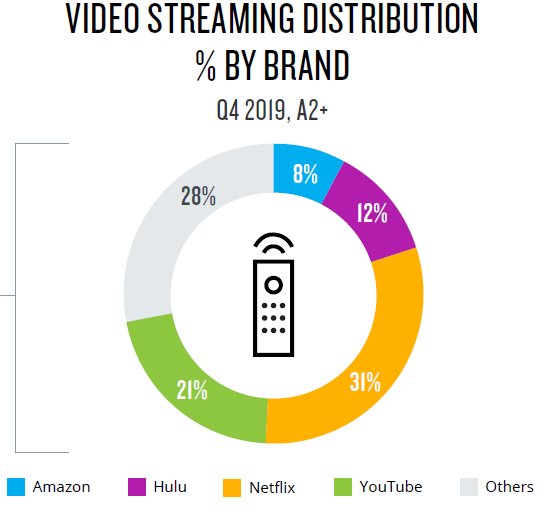

In [81]:
Image(filename='data/vis_Service_By_Brand_Mostpopular.PNG',width=400, height=200)

## Number_Of_Services_Subscribed_By_Age (NIESEN  REPORT)

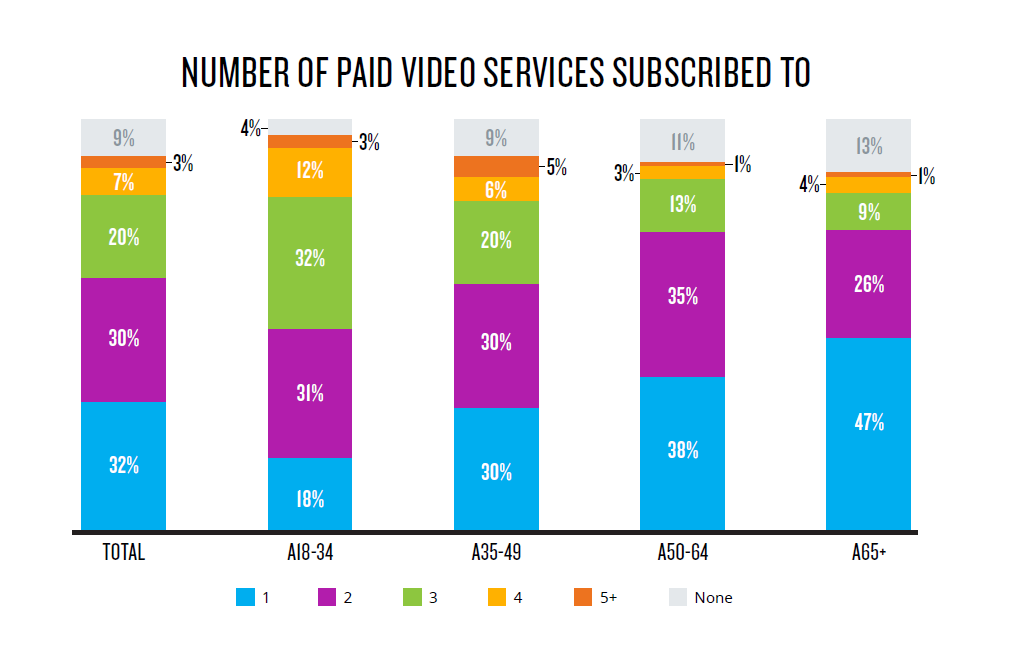

In [82]:
Image(filename='data/vis_Number_Of_Services_Subscribed.PNG',width=600, height=200)

### ######################
## NIESEN DATASET
### ######################

In [83]:
df_NIESEN_DATA = pd.read_csv('data/NIESEN_VOD_VIEWING_HABITS-V2.CSV')
df_NIESEN_DATA.describe()

,row,age,netflix,amazon,Showtime,youtube,fuboTV,Crackle,Discovery+,CBS All Access,...,FOX,PlutoTV,HBO MAX,Starz,Disney+,IMDb TV,FX,Tubi,NBC,Peacock
count,10865.000000,10865.000000,5202.0,1537.0,435.0,3698.0,423.0,222.0,474.0,462.0,...,118.0,248.0,419.0,429.0,451.0,213.0,117.0,245.0,132.0,206.0
mean,5952.470410,47.657064,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,3436.981627,17.938762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,18.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,2976.000000,32.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,5953.000000,47.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,8921.000000,63.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,11902.000000,79.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [84]:
df_NIESEN_DATA.head(5)

,row,age,username,freq,services,netflix,amazon,Showtime,youtube,fuboTV,...,FOX,PlutoTV,HBO MAX,Starz,Disney+,IMDb TV,FX,Tubi,NBC,Peacock
0,0,29,elsie_farrell,2-FEW_TIMES_WEEK,"{'netflix': 1, 'amazon': 1}",1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,57,candace_winfrey,2-FEW_TIMES_WEEK,{'netflix': 1},1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,52,wilhelmina_hancock,3-FEWER_THREE_PER_MONTH,"{'netflix': 1, 'Showtime': 1}",1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,24,jane_vogel,3-FEWER_THREE_PER_MONTH,{'youtube': 1},NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,37,dion_landis,3-FEWER_THREE_PER_MONTH,{'netflix': 1},1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df=df_NIESEN_DATA
bins=[18,34,50,65,100]
df['age_range'] = pd.cut(df['age'], bins=bins, labels=['18-34','34-50','50-65','65+'])
df = df.loc[:, ['age','age_range','freq','netflix','youtube','amazon','hulu', 'services']]
df

,age,age_range,freq,netflix,youtube,amazon,hulu,services
0,29,18-34,2-FEW_TIMES_WEEK,1.0,NaN,1.0,NaN,"{'netflix': 1, 'amazon': 1}"
1,57,50-65,2-FEW_TIMES_WEEK,1.0,NaN,NaN,NaN,{'netflix': 1}
2,52,50-65,3-FEWER_THREE_PER_MONTH,1.0,NaN,NaN,NaN,"{'netflix': 1, 'Showtime': 1}"
3,24,18-34,3-FEWER_THREE_PER_MONTH,NaN,1.0,NaN,NaN,{'youtube': 1}
4,37,34-50,3-FEWER_THREE_PER_MONTH,1.0,NaN,NaN,NaN,{'netflix': 1}
...,...,...,...,...,...,...,...,...
10860,61,50-65,3-FEWER_THREE_PER_MONTH,NaN,NaN,NaN,NaN,{'HBO MAX': 1}
10861,20,18-34,1-DAILY,1.0,NaN,NaN,NaN,{'netflix': 1}
10862,48,34-50,2-FEW_TIMES_WEEK,1.0,NaN,NaN,NaN,"{'netflix': 1, 'Peacock': 1}"
10863,75,65+,1-DAILY,NaN,NaN,NaN,NaN,{'Crackle': 1}


In [86]:
df.describe()

,age,netflix,youtube,amazon,hulu
count,10865.000000,5202.0,3698.0,1537.0,2213.0
mean,47.657064,1.0,1.0,1.0,1.0
std,17.938762,0.0,0.0,0.0,0.0
min,18.000000,1.0,1.0,1.0,1.0
25%,32.000000,1.0,1.0,1.0,1.0
50%,47.000000,1.0,1.0,1.0,1.0
75%,63.000000,1.0,1.0,1.0,1.0
max,79.000000,1.0,1.0,1.0,1.0


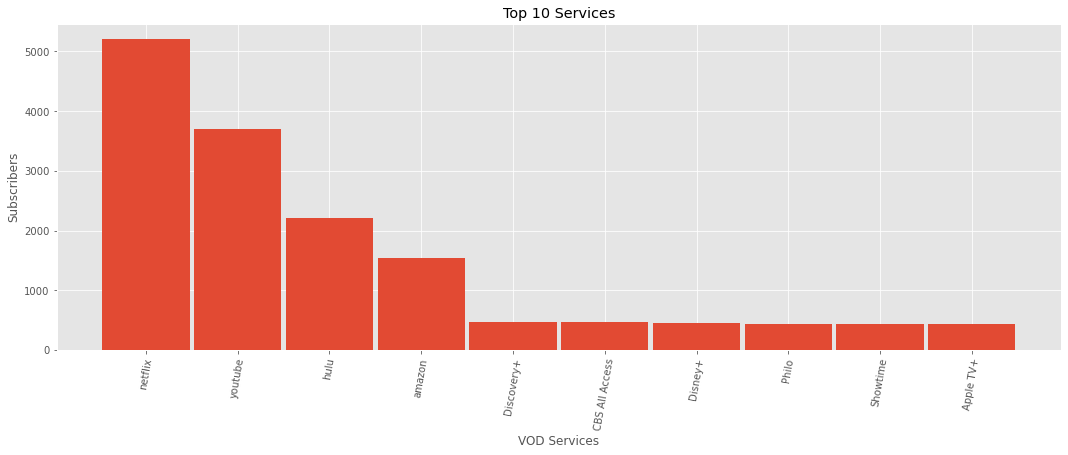

In [87]:
df=df_NIESEN_DATA 
df=df.describe()
df=df.drop(columns=['row','age'])
df=df.loc['count']  
y1=df.sort_values(ascending=False)[0:10]
fig, (ax, ax1) = plt.subplots(2, figsize=(18,6))
ax = plt.subplot(111) 
ax.bar(y1.index, y1, width=.95 )      
ax.set(title='Top 10 Services', ylabel='Subscribers', xlabel='VOD Services')  
plt.setp(ax.xaxis.get_majorticklabels(), rotation=80)
plt.show() 

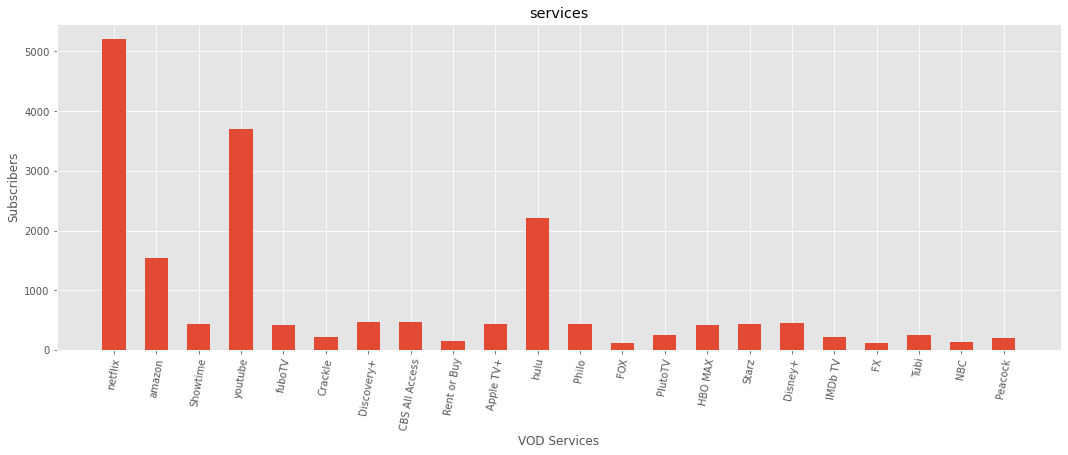

In [88]:
y1=df
fig, (ax, ax1) = plt.subplots(2, figsize=(18,6))
ax = plt.subplot(111) 
ax.bar(y1.index, y1, width=.55 )      
ax.set(title='services', ylabel='Subscribers', xlabel='VOD Services')  
plt.setp(ax.xaxis.get_majorticklabels(), rotation=80)
plt.show() 

### WATCH FREQUENCY BY AGE RANGE

In [89]:
df=df_NIESEN_DATA 
bins = [18, 34, 50, 65, 100]
df['age_range'] = pd.cut(df['age'], bins=bins, labels=['18-34','34-50','50-65','65+']) 
freq_list = ['1-DAILY','2-FEW_TIMES_WEEK','3-FEWER_THREE_PER_MONTH' ] 




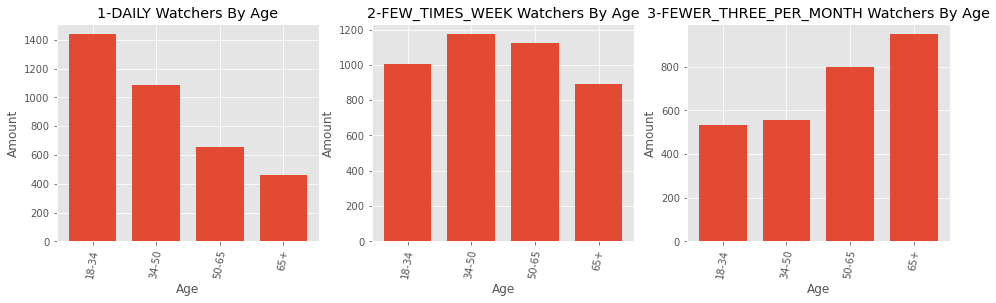

In [90]:
 
pindx = 0
fig,(ax) = plt.subplots(2, figsize=(16, 4))  
for f in freq_list:    
    pindx=pindx+1
    ax = plt.subplot(1, 3, pindx) 
    PERDAY = df.loc[df.freq==f]  
    y1=PERDAY.loc[:,['freq', 'age_range']].groupby('age_range', as_index=False).count()  
    ax.bar(y1.age_range, y1.freq, width=.75 )      
    ax.set(title=f'{f} Watchers By Age', ylabel='Amount', xlabel='Age')  
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=80)
 
     
plt.show()

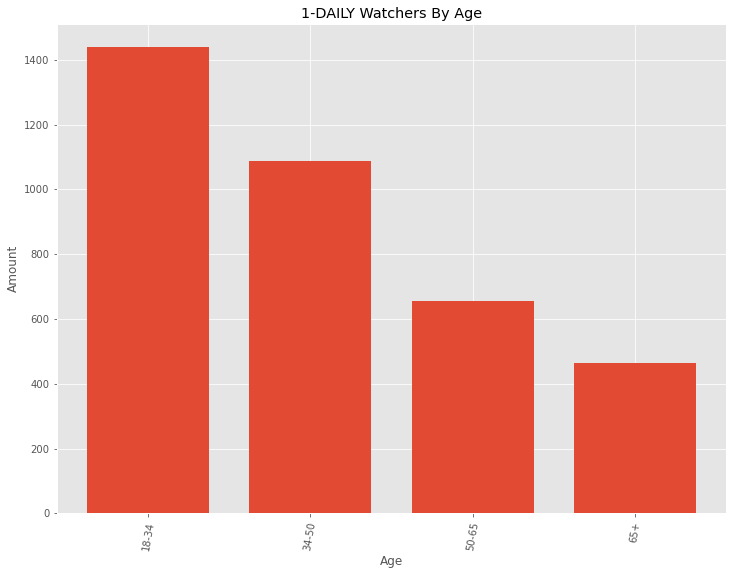

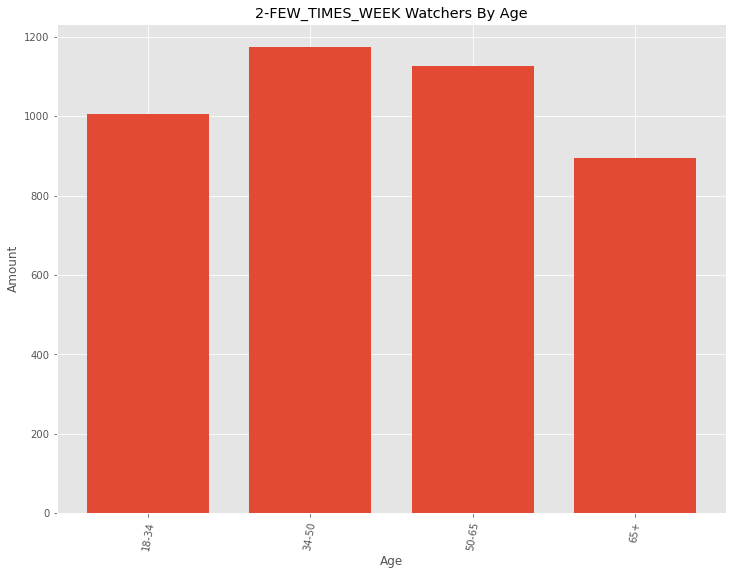

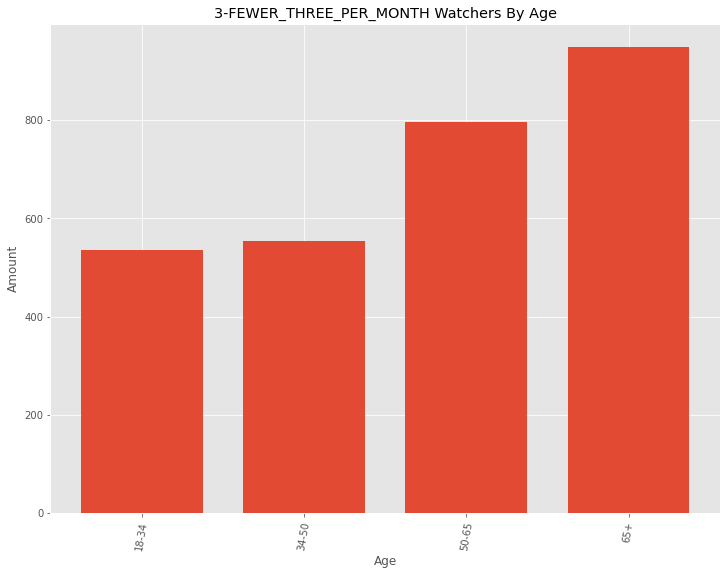

In [92]:

for f in freq_list: 
    PERDAY = df.loc[df.freq==f] 
    y1=PERDAY.loc[:,['freq', 'age_range']].groupby('age_range', as_index=False).count()   
    fig, (ax, ax1) = plt.subplots(2, figsize=(12,9))
    ax = plt.subplot(111) 
    ax.bar(y1.age_range, y1.freq, width=.75 )      
    ax.set(title=f'{f} Watchers By Age', ylabel='Amount', xlabel='Age')  
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=80)
    plt.show() 